In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('test_2umaH9m.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [5]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(3.0)
df['education'] = df['education'].fillna("Bachelor's")

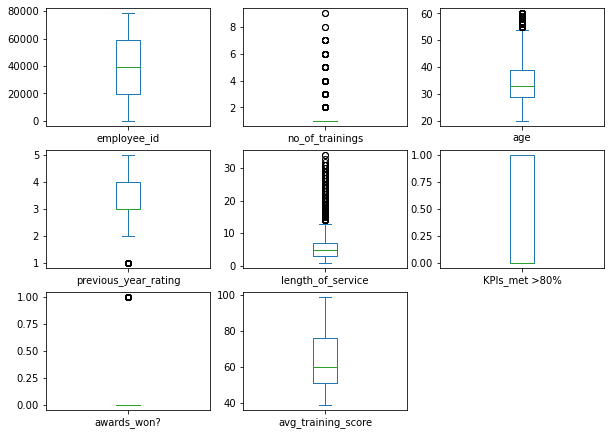

In [6]:
df.plot(kind ='box', subplots =True,sharex =True,sharey= False, layout = (4,3), figsize=(10,10))
plt.show()

In [7]:
up = 50
df.loc[df['age']>up,'age'] = up
df.loc[df['length_of_service']>15.0, 'length_of_service'] = 15.0 #capping

In [8]:
eds = {"Bachelor's": 1, "Master's & above" : 2,"Below Secondary": 3 }
gender = {'m':0, 'f':1}
chanl = {'other' : 0, 'sourcing':1 , 'referred':2}
df['education'] = df['education'].map(eds)
df['gender'] = df['gender'].map(gender)
df['recruitment_channel'] = df['recruitment_channel'].map(chanl)
#department, region
import joblib
le1department = joblib.load('le1department.sav')
le2region = joblib.load('le2region.sav')

In [9]:
df['region'] = le2region.transform(df[['region']])
df['department'] =le1department.transform(df[['department']])

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [11]:
X =df.drop('employee_id', axis =1)

In [12]:
sc = joblib.load('scaler.sav')

In [13]:
X = pd.DataFrame(sc.transform(X), columns = X.columns)
X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,-0.002140,0.004165,0.014364,-0.009042,-0.005346,0.002011,0.005357,0.007000,-0.012164,0.014363,-0.002633,-0.009245
std,1.003383,0.995472,1.010815,0.995970,0.994010,0.986297,1.020978,1.001811,0.994293,1.004360,0.991637,1.003015
min,-1.984338,-1.760319,-0.615759,-0.650947,-0.863402,-0.415276,-2.104490,-1.897069,-1.270713,-0.736986,-0.154018,-1.823794
25%,-0.388183,-0.505309,-0.615759,-0.650947,-0.863402,-0.415276,-0.797225,-0.250651,-0.728615,-0.736986,-0.154018,-0.926359
50%,0.010855,-0.163034,-0.615759,-0.650947,-0.863402,-0.415276,-0.216218,-0.250651,-0.186517,-0.736986,-0.154018,-0.253282
75%,0.808933,0.635609,1.425277,1.536223,0.992045,-0.415276,0.655291,0.572557,0.355581,1.356878,-0.154018,0.943298
max,1.207972,2.004710,3.466313,1.536223,2.847493,12.715440,2.253059,1.395766,2.523973,1.356878,6.492758,2.663382


In [14]:
pca = joblib.load('pca.sav')
x_pca = pca.transform(X)
X['pca1'] = x_pca

In [15]:
rf1 = joblib.load('rf1.sav')

In [16]:
y_pred  = rf1.predict(X)

In [17]:
df['is_promoted'] = y_pred

In [18]:
out = df[['employee_id', 'is_promoted']]
out.set_index('employee_id',inplace =True)

In [19]:
out.to_csv('out_rf1.csv')

In [20]:
gb1 = joblib.load('gb1.sav')
y_pred  = gb1.predict(X)
df['is_promoted'] = y_pred
out = df[['employee_id', 'is_promoted']]
out.set_index('employee_id',inplace =True)
out.to_csv('out_gb1.csv')

In [21]:
xgbc1 = joblib.load('xgbc.sav')
y_pred  = xgbc1.predict(X)
df['is_promoted'] = y_pred
out = df[['employee_id', 'is_promoted']]
out.set_index('employee_id',inplace =True)
out.to_csv('out_xgbc1.csv')